In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


# ***Personal Key Indicators of Heart Disease***
# Reasone of the project:
    Heart disease is one of the major causes of death for persons of most races in the US, according to the CDC (African Americans, American Indians and Alaska Natives, and white people). High blood pressure, high cholesterol, and smoking are the three main risk factors for heart disease that at least half of all Americans (47%) have. Other significant indicators are the presence of diabetes, obesity (high BMI), a lack of physical activity, and excessive alcohol consumption. In the field of medicine, it is crucial to identify and combat the causes that have the biggest influence on heart disease. In turn, advances in computation enable the use of machine learning techniques to identify "patterns" in data that can foretell a patient's state.

# **About Data**



- info about columns :            
   * HeartDisease >> Tells us if the person having coronary heart disease (CHD) or myocardial infarction (MI) or not.
   * BMI >> Body Mass Index (BMI) comes from a person's weight divided by the square of height it screens for weight categories that may lead to health problems. A high BMI can indicate high body fat.
   * Smoking >> Tells us if you smoking or not .
   * AlcoholDrinking >> Tells us if person drinking alcohol or not.
   * Stroke >> Tells us if you had a stroke or not .
   * PhysicalHealth >> includes physical illness and injury, for how many days during the past 30 .
   * MentalHealth >> includes mental health, for how many days during the past 30 .
   * DiffWalking >> Tells us if person have serious difficulty walking or climbing stairs.
   * Sex >> Tells us your gender.
   * AgeCategory >>  Tells us your age category which Fourteen-level age category.
   * GenHealth >> Tells us about socially/emotionally healthy during childhood .
   * SleepTime >> Tells us about person sleeping time . 	
   * Asthma	>> Tells us if person have Asthma or not. 
   * KidneyDisease >> Tells us if person have Asthma or not. # You are at greater risk for kidney disease if person have diabetes or high blood pressure.
   * SkinCancer >> Tells us if person have SkinCancer or not. 
   * Race >> Tells us about person's race.
   * PhysicalActivity >>Tells us if person has Physical Activity or not which  refers to all movement including during leisure time, for transport to get to and from places, or as part of a person's work.
   * Diabatic >>Tells us if person have Diabatic or not. 

In [81]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
import sklearn.metrics as metrics
import scikitplot as skplt

In [43]:
# Reading  dataset
df= pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Preprocessing

In [44]:
df.shape

(319795, 18)

Data set has 319795 rows and 18 columns


In [45]:
# Data Exploration
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [46]:
# checking null values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [47]:
df.isnull().sum().any()

False

**We don't have null values**

In [48]:
# Data description
df.describe()[1:].T.style.background_gradient(cmap='PiYG')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [49]:
df.describe(include=['O'])[1:].T.style.background_gradient(cmap='PiYG')

,unique,top,freq
HeartDisease,2,No,292422
Smoking,2,No,187887
AlcoholDrinking,2,No,298018
Stroke,2,No,307726
DiffWalking,2,No,275385
Sex,2,Female,167805
AgeCategory,13,65-69,34151
Race,6,White,245212
Diabetic,4,No,269653
PhysicalActivity,2,Yes,247957


In [50]:
# checking duplicated data
print(f'Nubmer of duplicated recrods = {df.duplicated().sum()}')

Nubmer of duplicated recrods = 18078


In [51]:
# After droping duplicated data 
df.drop_duplicates(keep='first',inplace=True)
print(f'Nubmer of duplicated recrods = {df.duplicated().sum()}')

Nubmer of duplicated recrods = 0


In [52]:
# number of unique values in each col
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [53]:
value_count = dict()
for col in df :
    print(col)
    value , count = df[col].value_counts().index , df[col].value_counts().values
    value_count['value']  = list(value)
    value_count['count'] = list(count)
    value_count_df = pd.DataFrame(value_count)
    display(value_count_df.head(10))

HeartDisease


,value,count
0,No,274456
1,Yes,27261


BMI


,value,count
0,26.63,3244
1,27.46,2425
2,27.44,2385
3,24.41,2173
4,27.12,2062
5,25.10,1897
6,32.28,1755
7,29.29,1716
8,28.70,1684
9,29.53,1668


Smoking


,value,count
0,No,174312
1,Yes,127405


AlcoholDrinking


,value,count
0,No,280136
1,Yes,21581


Stroke


,value,count
0,No,289653
1,Yes,12064


PhysicalHealth


,value,count
0,0.0,208611
1,30.0,19503
2,2.0,14846
3,1.0,10459
4,3.0,8608
5,5.0,7590
6,10.0,5450
7,15.0,5012
8,7.0,4629
9,4.0,4467


MentalHealth


,value,count
0,0.0,187898
1,30.0,17351
2,2.0,16309
3,5.0,14004
4,10.0,10459
5,3.0,10412
6,15.0,9871
7,1.0,9235
8,7.0,5516
9,20.0,5426


DiffWalking


,value,count
0,No,257362
1,Yes,44355


Sex


,value,count
0,Female,159671
1,Male,142046


AgeCategory


,value,count
0,65-69,31670
1,60-64,31219
2,70-74,29273
3,55-59,27610
4,50-54,23736
5,80 or older,23352
6,75-79,20713
7,45-49,20518
8,18-24,19998
9,40-44,19837


Race


,value,count
0,White,227724
1,Hispanic,27107
2,Black,22810
3,Other,10891
4,Asian,7993
5,American Indian/Alaskan Native,5192


Diabetic


,value,count
0,No,251796
1,Yes,40589
2,"No, borderline diabetes",6776
3,Yes (during pregnancy),2556


PhysicalActivity


,value,count
0,Yes,230412
1,No,71305


GenHealth


,value,count
0,Very good,104796
1,Good,91239
2,Excellent,59737
3,Fair,34659
4,Poor,11286


SleepTime


,value,count
0,8.0,90202
1,7.0,89445
2,6.0,64655
3,5.0,19101
4,9.0,15853
5,10.0,7782
6,4.0,7730
7,12.0,2204
8,3.0,1992
9,2.0,788


Asthma


,value,count
0,No,259066
1,Yes,42651


KidneyDisease


,value,count
0,No,289941
1,Yes,11776


SkinCancer


,value,count
0,No,272425
1,Yes,29292


# **Visualization**

**Pie Chart**

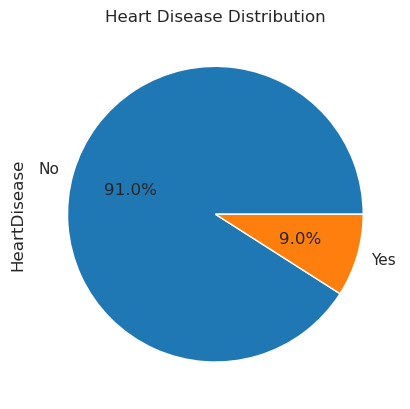

In [54]:
#Pie Chart of the target column 
df['HeartDisease'].value_counts().plot.pie(autopct='%.1f%%', colors = ['#1f77b4', '#ff7f0e'])
plt.title("Heart Disease Distribution")
plt.show()

**Histogram**

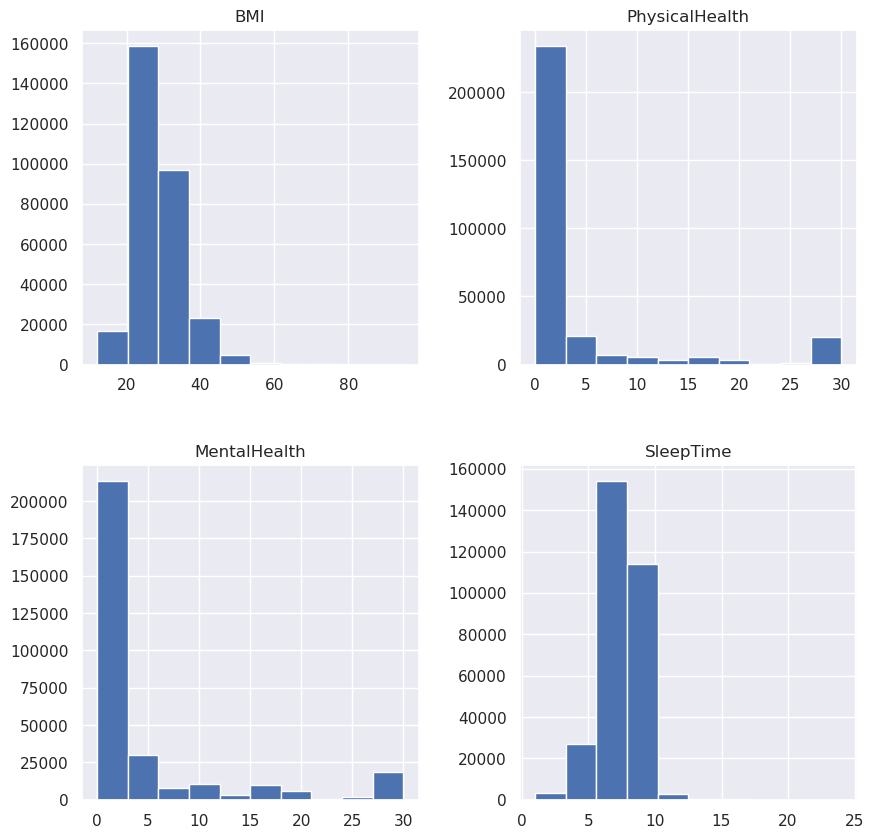

In [55]:
#Histogram of the data
sns.set()
df.hist(figsize=(10,10));

In [56]:
#Distributing data into numeriacl and categorical columns depending on its type
numerical = []
categorical = []
for col in df.columns:
    if df[col].dtype==np.float64:
        numerical.append(col)
    else :
        categorical.append(col)
print(numerical)
print(categorical)

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


**Checking Outliers**

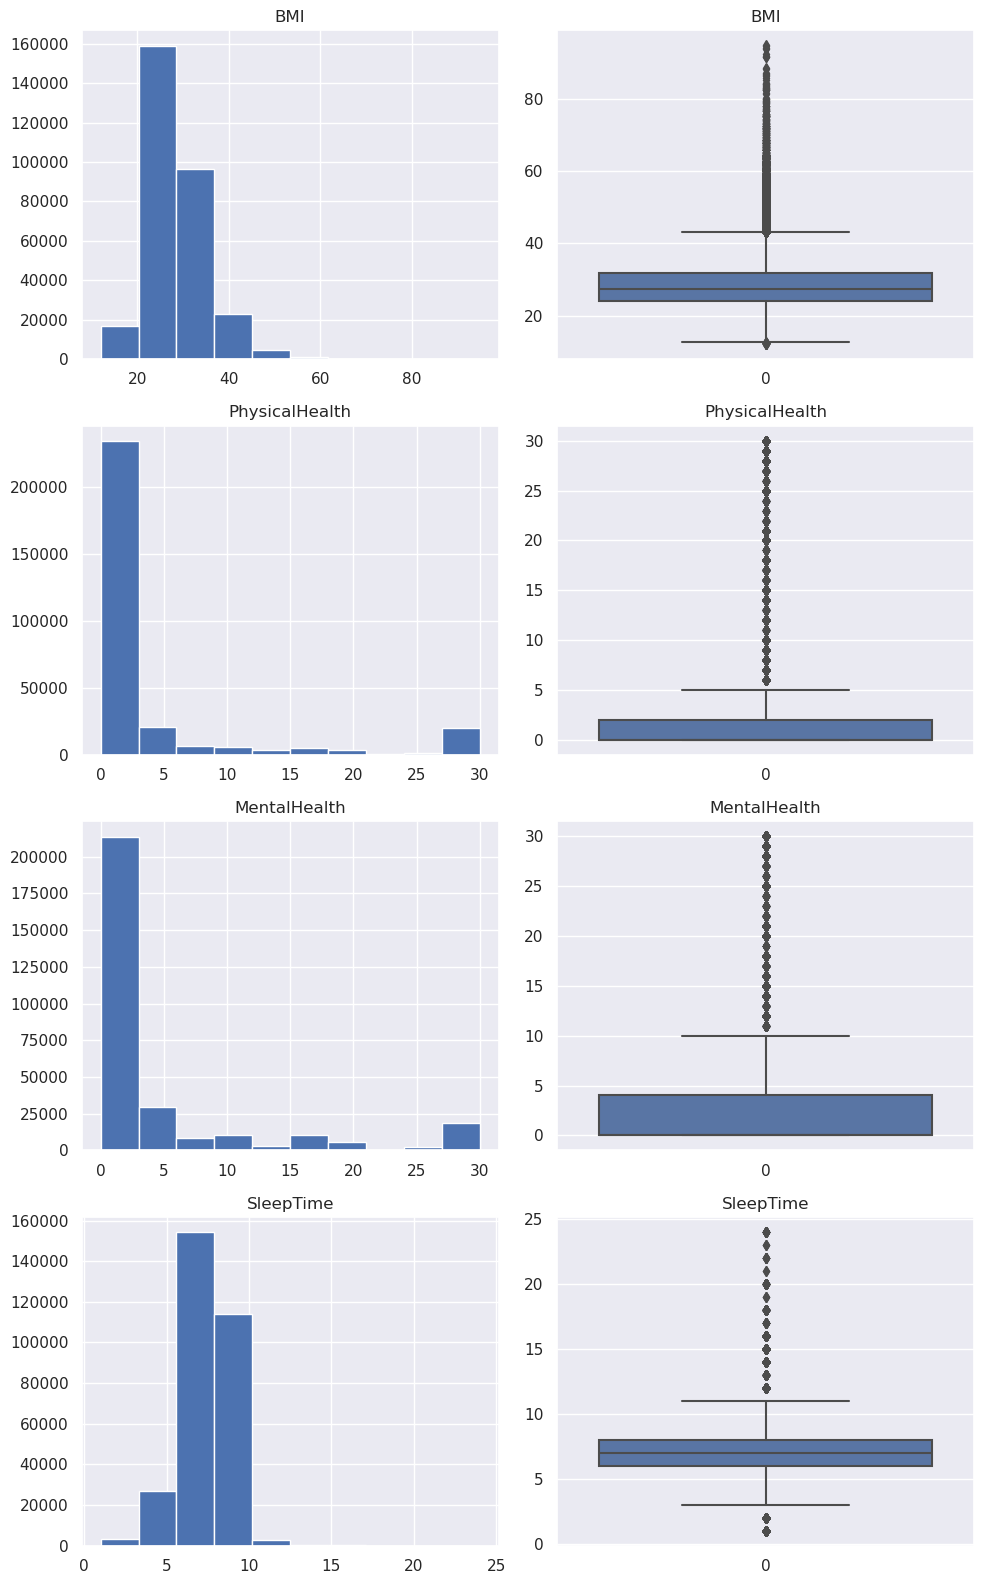

In [57]:
#Histogram and box plot for the numerical columns
fig, axes = plt.subplots(nrows=len(numerical), ncols=2, figsize=(10, 4*len(numerical)))

for i, feature in enumerate(numerical):
    axes[i, 0].hist(df[feature])
    axes[i, 0].set_title(feature)
    sns.boxplot(data=df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(feature)

plt.tight_layout()
plt.show()

**Bar plot**

Relation between HeartDisease and the nature factors


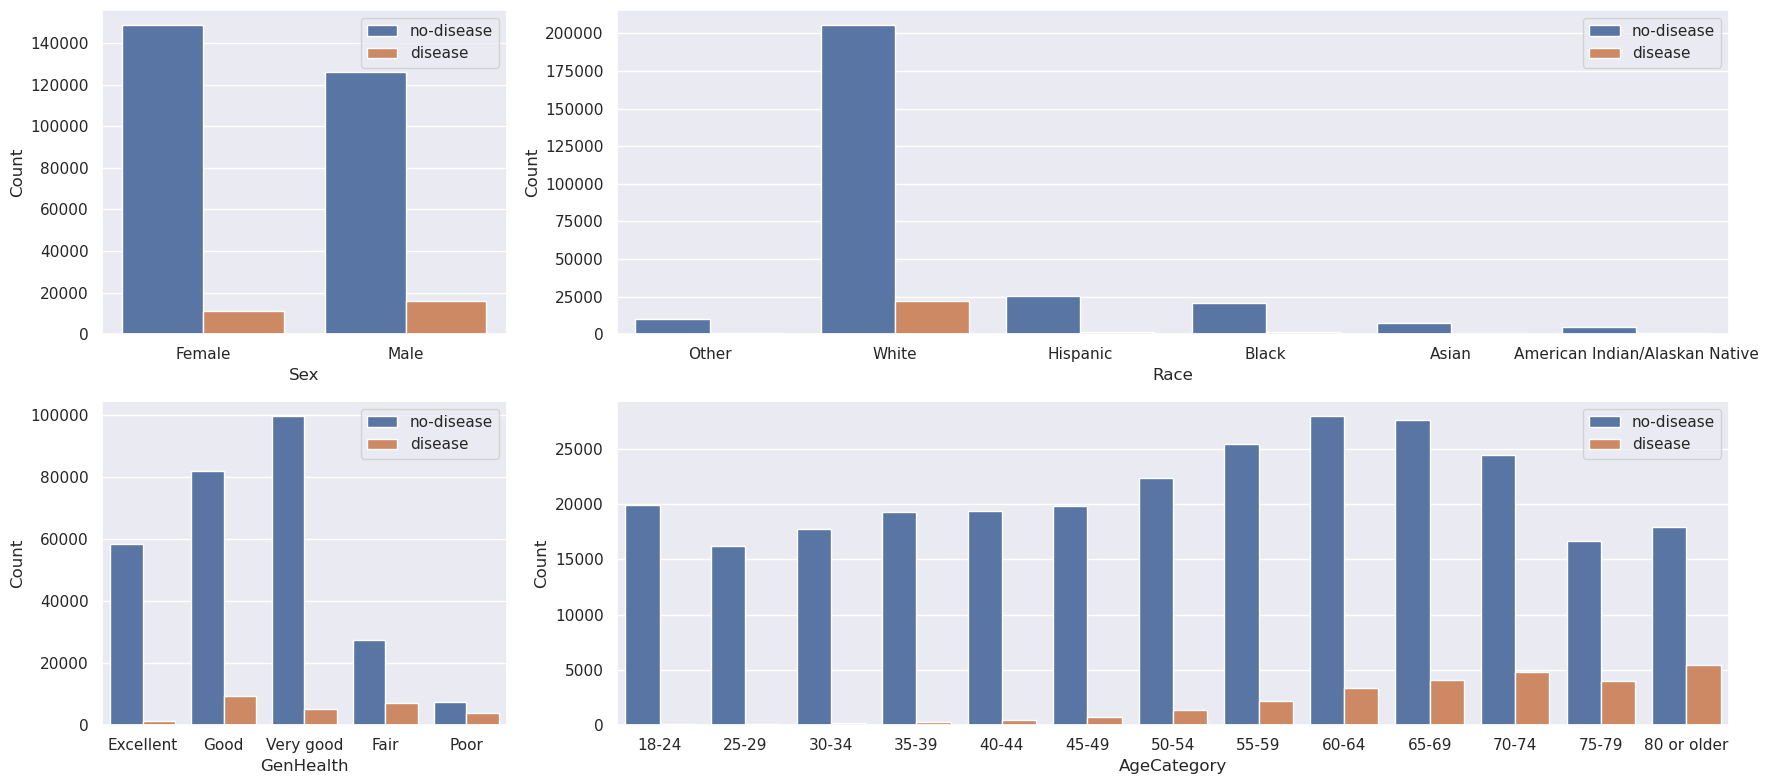

In [58]:
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[0.8, 2.2])

# Define the features of interest
features = ['Sex', 'Race', 'GenHealth', 'AgeCategory']

df = df.sort_values(by='AgeCategory')

# Loop through each feature and create a countplot in the appropriate subplot
for i, feature in enumerate(features):
    ax = fig.add_subplot(gs[i])
    sns.countplot(x=feature, hue='HeartDisease', data=df, ax=ax)
    ax.legend(labels=['no-disease', 'disease'])
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Relation between HeartDisease and persons's lifestyle


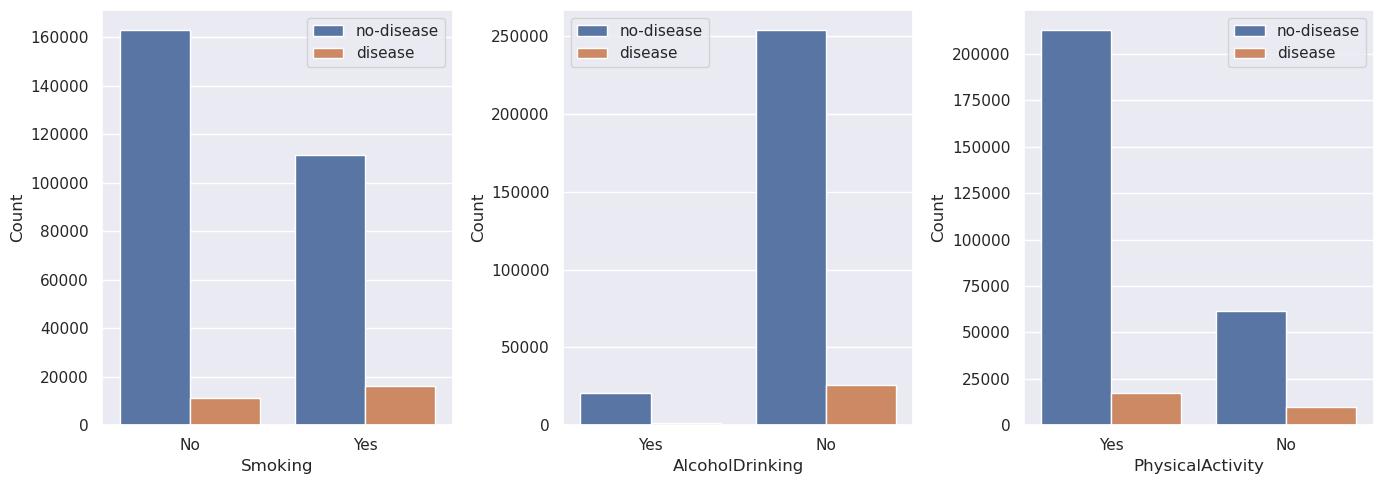

In [59]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

# Define the features of interest
features = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity']

# Loop through each feature and create a countplot in the appropriate subplot
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue='HeartDisease', data=df, ax=axes[i])
    axes[i].legend(labels=['no-disease', 'disease'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Relation between HeartDisease and other diseases


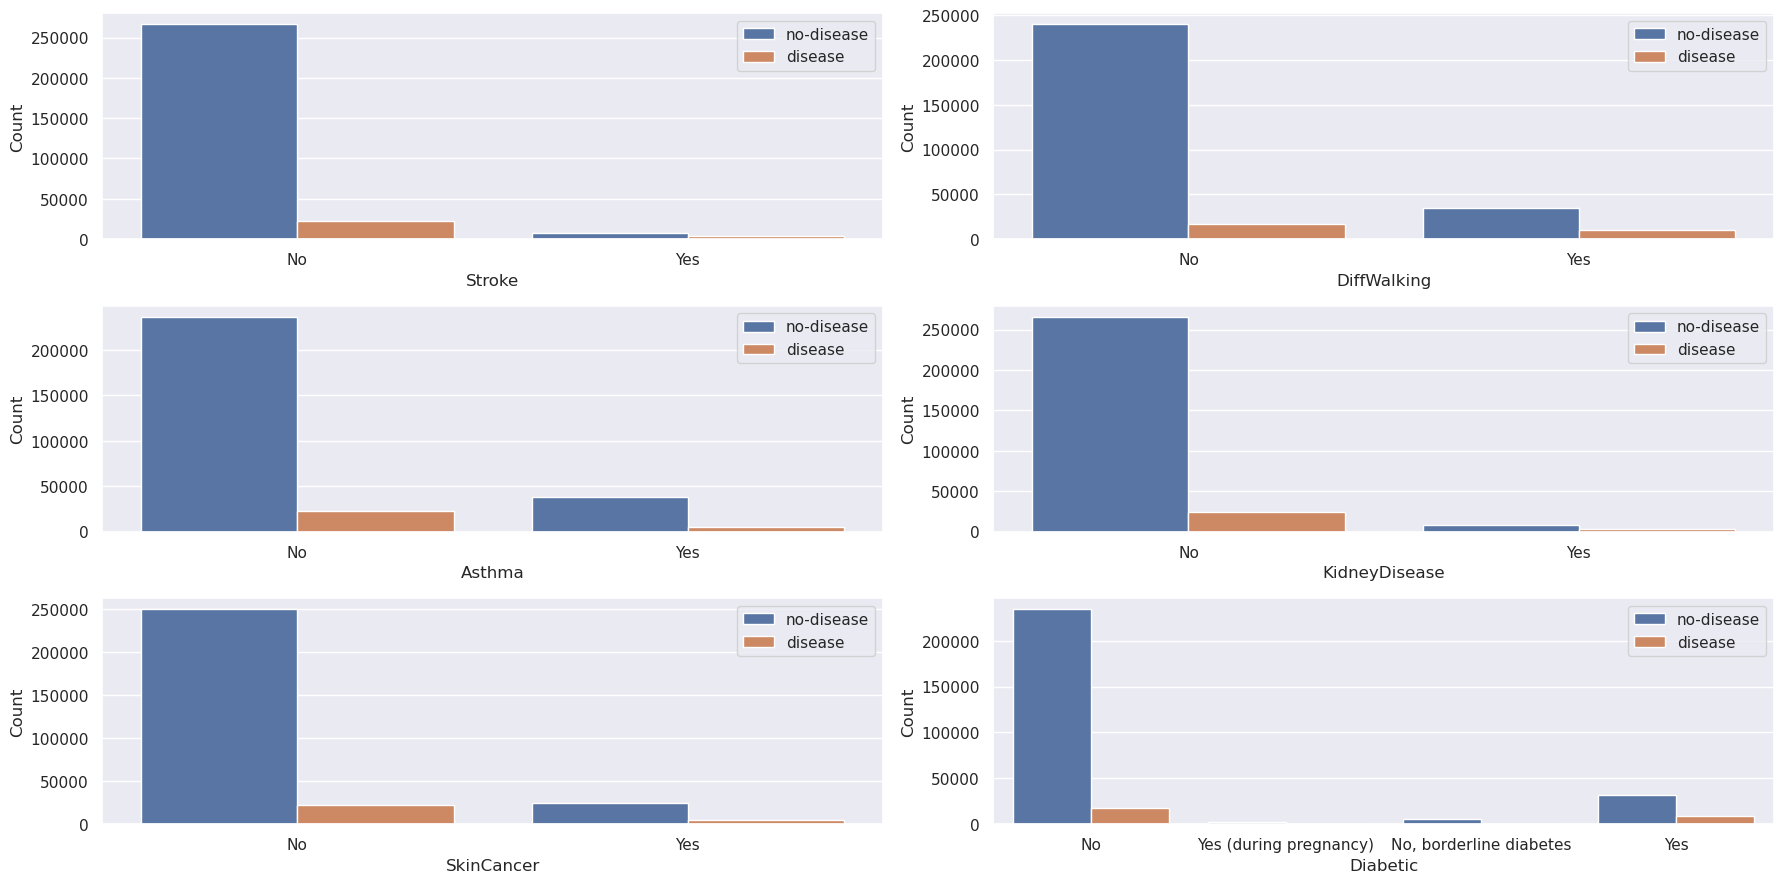

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 9))

features = ['Stroke', 'DiffWalking', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Diabetic']

for i, feature in enumerate(features):
    sns.countplot(x=feature, hue='HeartDisease', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].legend(labels=['no-disease', 'disease'])
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [61]:
#Distributing BMI values into four main categories
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
BMI_category = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

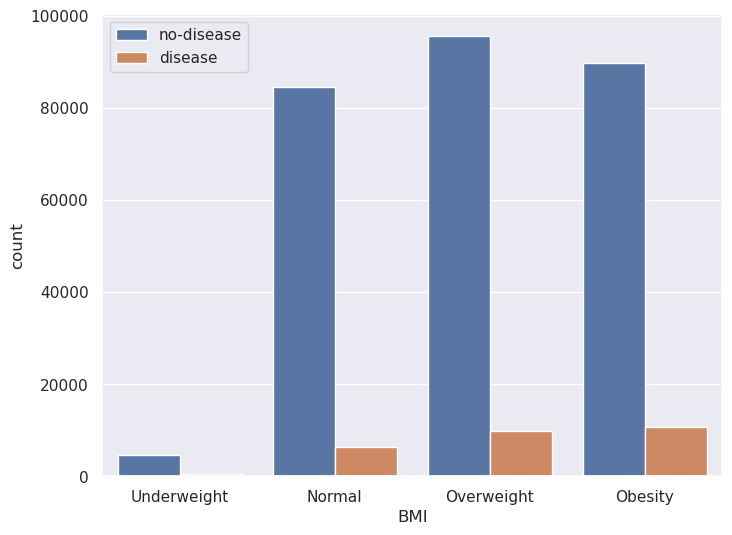

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x= BMI_category, hue='HeartDisease', data=df)
plt.legend(labels=['no-disease','disease'])

It's obvious that elder people who have obesity more likely to develop heart disease.

**Visualization of numerical columns**

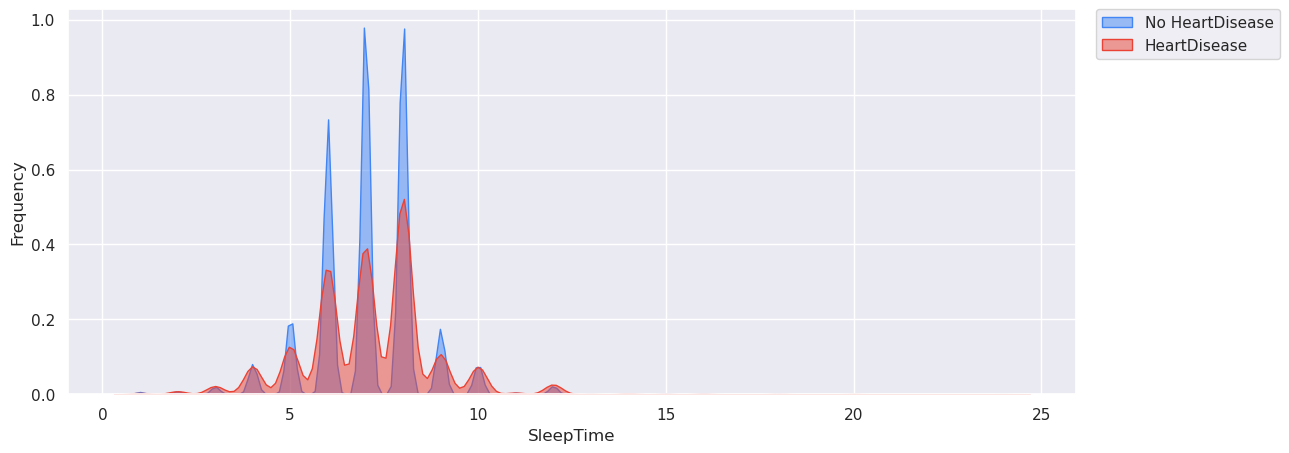

In [63]:
#kdeplot for SleepTime numerical column
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.5, fill=True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5, fill=True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

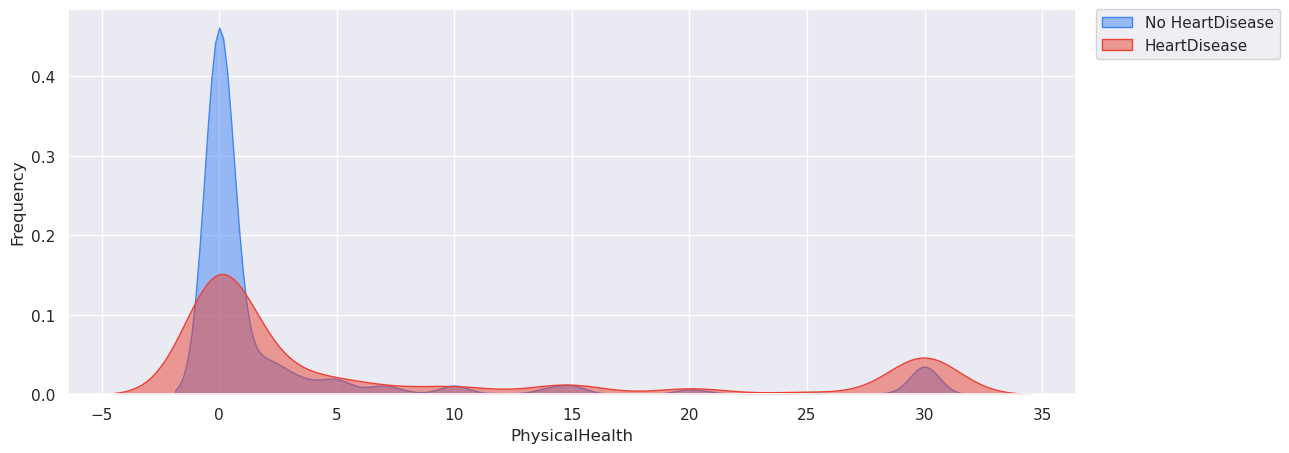

In [64]:
#kdeplot for PhysicalHealth numerical column
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

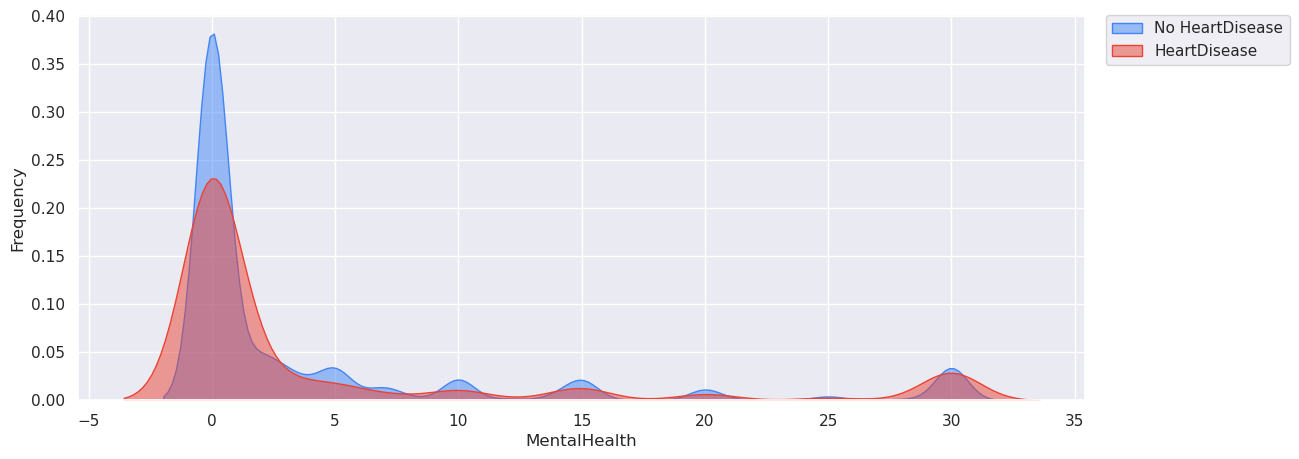

In [65]:
#kdeplot for MentalHealth numerical column
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

**HeatMap**

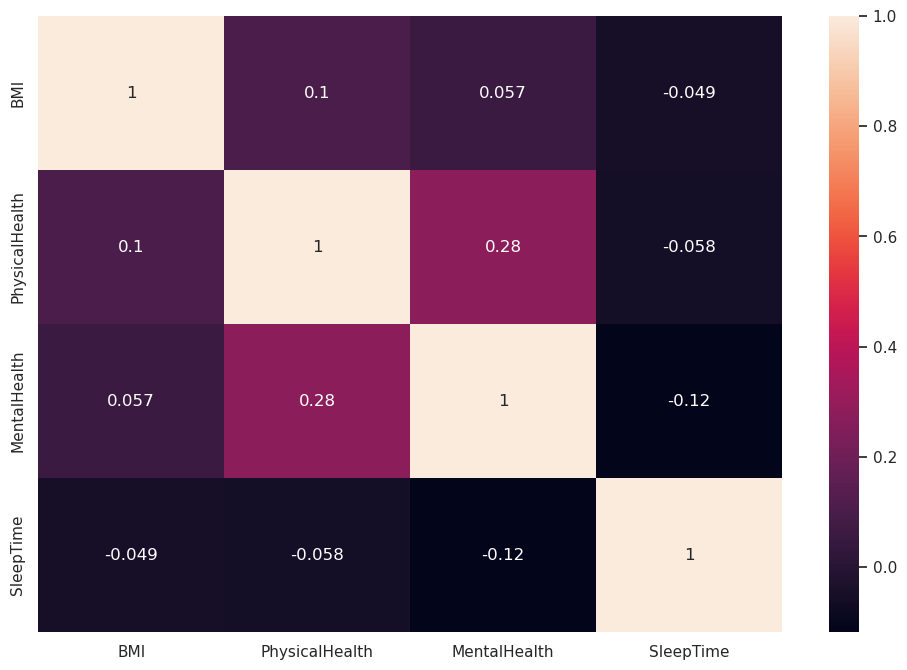

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#  Data standardization and splitting
****

In [67]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=list(categorical))
df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
75124,21.79,0.0,15.0,8.0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
227676,21.95,0.0,5.0,10.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
177226,25.68,0.0,0.0,4.0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
177220,26.50,1.0,5.0,6.0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
177219,24.69,0.0,0.0,9.0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71604,26.04,7.0,0.0,8.0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
297671,18.30,0.0,0.0,7.0,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
71615,27.75,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
71638,30.11,0.0,0.0,7.0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [68]:
df.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease_No',
       'HeartDisease_Yes', 'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes', 'DiffWalking_No',
       'DiffWalking_Yes', 'Sex_Female', 'Sex_Male', 'AgeCategory_18-24',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asth

In [ ]:
x = df.drop(labels=['HeartDisease_No','HeartDisease_Yes'], axis=1)  #features
y = df['HeartDisease_Yes']    #target variable 

In [71]:
# Apply feature scaling to the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [72]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns of the dataframe
for col in df.columns:
    # If the datatype of the column is 'object' i.e. categorical
    if df[col].dtype == 'object':
        # Use the LabelEncoder to transform the categorical data to numerical data
        df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 75124 to 319794
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  301717 non-null  float64
 1   PhysicalHealth                       301717 non-null  float64
 2   MentalHealth                         301717 non-null  float64
 3   SleepTime                            301717 non-null  float64
 4   HeartDisease_No                      301717 non-null  uint8  
 5   HeartDisease_Yes                     301717 non-null  uint8  
 6   Smoking_No                           301717 non-null  uint8  
 7   Smoking_Yes                          301717 non-null  uint8  
 8   AlcoholDrinking_No                   301717 non-null  uint8  
 9   AlcoholDrinking_Yes                  301717 non-null  uint8  
 10  Stroke_No                            301717 non-null  uint8  
 11  Stroke_Ye

In [73]:
# split dataset to train,test
from sklearn.model_selection import train_test_split

# Split data into training and testing sets with 70-30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40, shuffle=True)
print('Shape of the x_train data : ', x_train.shape)
print('Shape of the y_train data : ', y_train.shape)
print('Shape of the x_test data : ', x_test.shape)
print('Shape of the y_test data : ', y_test.shape)

Shape of the x_train data :  (211201, 50)
Shape of the y_train data :  (211201,)
Shape of the x_test data :  (90516, 50)
Shape of the y_test data :  (90516,)


# SVM Model

In [ ]:
# Building a model using Support Vector Machine
from sklearn import svm
svm_classifier= svm.SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

  svm( kernel= linear)

**Model Evaluation**

In [ ]:
# Predict on the testing set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy scores
train_accuracy = svm_classifier.score(x_train, y_train)
test_accuracy = svm_classifier.score(x_test, y_test)

print('Accuracy score of SVM training data : {}%\n'.format(train_accuracy*100))
print('Accuracy score of SVM test data : {}% \n'.format(test_accuracy*100))

print('\n SVM Classification Report: \n',classification_report(y_test, y_pred))

Accuracy score of training data : 90.92854673983551%

Accuracy score of test data : 91.0490962923682% 


 Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     82414
           1       0.00      0.00      0.00      8102

    accuracy                           0.91     90516
   macro avg       0.46      0.50      0.48     90516
weighted avg       0.83      0.91      0.87     90516

In [ ]:
# Calculate confusion matrix
test_SVM = confusion_matrix(y_test, y_pred) 

# Plot confusion matrix for testing set
plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title("Testing Set Confusion Matrix of SVM")
plt.show()

# Logistic Resgression Model

In [74]:
# Building a model using LogisticRegression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

**Model Evaluation**

In [75]:
# Predict on the testing set
y_pred = log_reg.predict(x_test)

# Calculate accuracy scores
train_accuracy = log_reg.score(x_train, y_train)
test_accuracy = log_reg.score(x_test, y_test)

print('Accuracy score of Logistic Regression training data : {}%\n'.format(train_accuracy*100))
print('Accuracy score of Logistic Regression test data : {}% \n'.format(test_accuracy*100))

print('\n Logistic Regression Classification Report: \n',classification_report(y_test, y_pred))

Accuracy score of Logistic Regression training data : 91.08621644783878%

Accuracy score of Logistic Regression test data : 91.20376508020681% 


 Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     82414
           1       0.54      0.11      0.18      8102

    accuracy                           0.91     90516
   macro avg       0.73      0.55      0.57     90516
weighted avg       0.89      0.91      0.88     90516



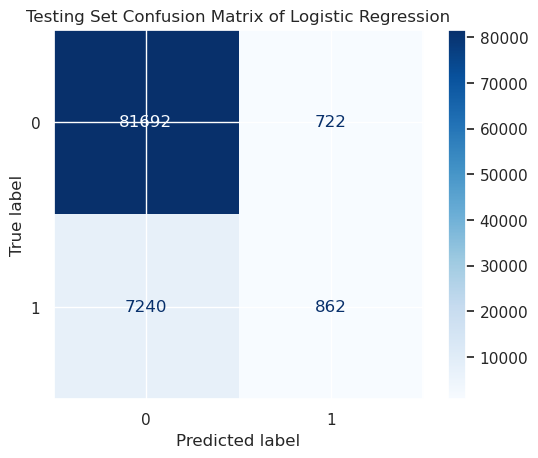

In [83]:
# Calculate confusion matrix
test_Log = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for testing set
Log_display = ConfusionMatrixDisplay(confusion_matrix=test_Log, display_labels=[0, 1])
Log_display.plot(cmap='Blues')
plt.title("Testing Set Confusion Matrix of Logistic Regression")
plt.show()

# Decision Tree Model

In [84]:
# Building Decision Tree model 
from sklearn import tree
DT = tree.DecisionTreeClassifier(random_state=0)
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

****Model Evaluation****

In [85]:
# Predict on the testing set
y_pred = DT.predict(x_test)

# Calculate accuracy scores
train_accuracy = DT.score(x_train, y_train)
test_accuracy = DT.score(x_test, y_test)

print('Accuracy score of Decision Tree training data : {}%\n'.format(train_accuracy*100))
print('Accuracy score of Decision Tree test data : {}% \n'.format(test_accuracy*100))

print('\n Decision Tree Classification Report: \n',classification_report(y_test, y_pred))

Accuracy score of Decision Tree training data : 99.72822098380216%

Accuracy score of Decision Tree test data : 85.47660082195414% 


 Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     82414
           1       0.22      0.25      0.24      8102

    accuracy                           0.85     90516
   macro avg       0.57      0.58      0.58     90516
weighted avg       0.86      0.85      0.86     90516



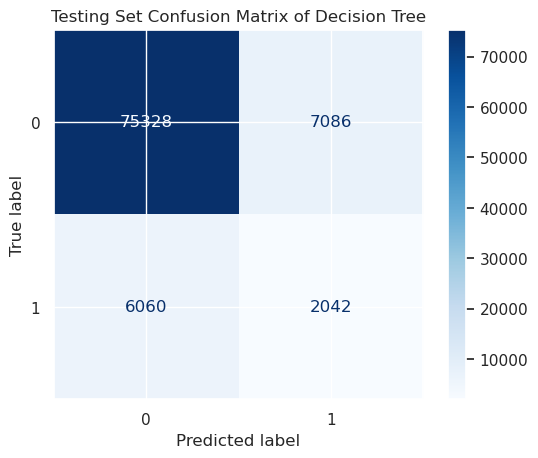

In [86]:
# Calculate confusion matrix
test_DT = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for testing set
DT_display = ConfusionMatrixDisplay(confusion_matrix=test_DT, display_labels=[0, 1])
DT_display.plot(cmap='Blues')
plt.title("Testing Set Confusion Matrix of Decision Tree")
plt.show()

# **KNN Model**

In [90]:
# Building a model using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train) 

KNeighborsClassifier()

In [92]:
# Predict on the testing set
y_pred = KNN.predict(x_test)

# Calculate accuracy scores
train_accuracy = KNN.score(x_train, y_train)
test_accuracy = KNN.score(x_test, y_test)

print('Accuracy score of KNN training data : {}%\n'.format(train_accuracy*100))
print('Accuracy score of KNN test data : {}% \n'.format(test_accuracy*100))

print('\n KNN Classification Report: \n',classification_report(y_test, y_pred))

Accuracy score of KNN training data : 92.1548666909721%

Accuracy score of KNN test data : 90.03712050908128% 


 KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     82414
           1       0.36      0.15      0.21      8102

    accuracy                           0.90     90516
   macro avg       0.64      0.56      0.58     90516
weighted avg       0.87      0.90      0.88     90516



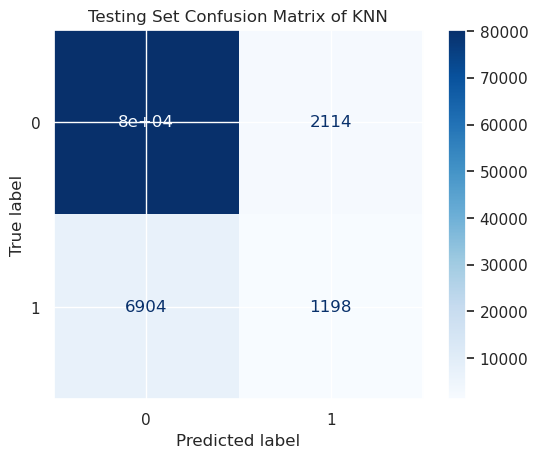

In [93]:
# Calculate confusion matrix
test_KNN = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for testing set
KNN_display = ConfusionMatrixDisplay(confusion_matrix=test_KNN, display_labels=[0, 1])
KNN_display.plot(cmap='Blues')
plt.title("Testing Set Confusion Matrix of KNN")
plt.show()

# **Random Forest Model**

In [87]:
# Building a model using RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state =6)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=6)

In [88]:
# Predict on the testing set
y_pred = RF_classifier.predict(x_test)

# Calculate accuracy scores
train_accuracy = RF_classifier.score(x_train, y_train)
test_accuracy = RF_classifier.score(x_test, y_test)

print('Accuracy score of Random Forest training data : {}%\n'.format(train_accuracy*100))
print('Accuracy score of Random Forest test data : {}% \n'.format(test_accuracy*100))

print('\n KNN Classification Report: \n',classification_report(y_test, y_pred))

Accuracy score of Random Forest training data : 99.71875133166984%

Accuracy score of Random Forest test data : 89.6548676477087% 


 KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     82414
           1       0.31      0.13      0.18      8102

    accuracy                           0.90     90516
   macro avg       0.62      0.55      0.56     90516
weighted avg       0.86      0.90      0.88     90516



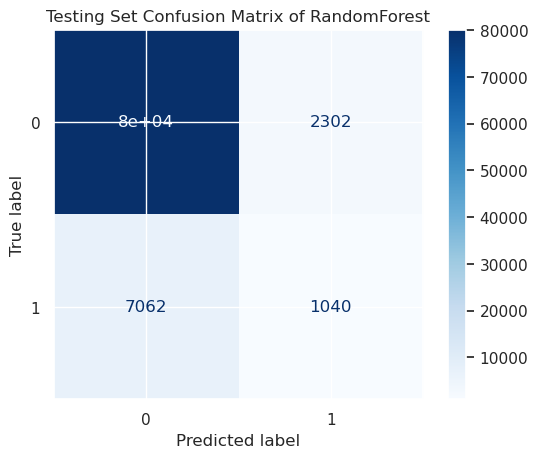

In [89]:
# Calculate confusion matrix
test_RF = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for testing set
RF_display = ConfusionMatrixDisplay(confusion_matrix=test_RF, display_labels=[0, 1])
RF_display.plot(cmap='Blues')
plt.title("Testing Set Confusion Matrix of RandomForest")
plt.show()

**Logistic Regression Model shows the highest accuracy.**